## 09_Create_Features_CheckoutData

Author: Daniel Hui

License: MIT

This notebook takes the checkout dataset and creates features for each unique title in the Seattle collection

In [2]:
import pandas as pd
import numpy as np

In [3]:
# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [13]:
checkouts_2017_df = pd.read_csv('../01_Data/06_Features/2017_Checkouts.csv',index_col=0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [14]:
checkouts_2017_df.head()

,BibNumber,YearMonth,CheckoutDateTime
0,3172300,201701,01/02/2017 08:13:00 AM
1,2393405,201701,01/02/2017 08:24:00 AM
2,2743540,201701,01/02/2017 08:33:00 AM
3,3216678,201701,01/02/2017 08:51:00 AM
4,3221781,201701,01/02/2017 08:51:00 AM


In [6]:
checkouts_2017_df.tail()

,BibNumber,YearMonth,CheckoutDateTime
3871867,2537697,201712,12/31/2017 04:59:00 PM
3871868,3184167,201712,12/31/2017 04:59:00 PM
3871869,3180267,201712,12/31/2017 04:59:00 PM
3871870,3209738,201712,12/31/2017 04:59:00 PM
3871871,3167774,201712,12/31/2017 06:01:00 PM


### Count the number of times each book is checked out per month

In [18]:
#Number of checkouts per month, per title
month_checkout_df = checkouts_2017_df.groupby(["BibNumber","YearMonth"]).count()
month_checkout_df = month_checkout_df.reset_index()
month_checkout_df = month_checkout_df.rename({"CheckoutDateTime":"Checkouts"},axis=1)
month_checkout_df.head(10)

,BibNumber,YearMonth,Checkouts
0,32,201709,1
1,33,201701,1
2,33,201707,1
3,33,201710,1
4,52,201709,1
5,91,201702,1
6,91,201703,4
7,91,201704,2
8,91,201706,1
9,91,201707,2


### EDA: How many months within 2017 was a book checked out? 

In [25]:
trailing_month_df = month_checkout_df.groupby(["BibNumber"]).count().reset_index()
trailing_month_df = trailing_month_df[["BibNumber","YearMonth"]]
trailing_month_df = trailing_month_df.rename({"YearMonth":"TrailingMonths"},axis=1)
trailing_month_df.head()

,BibNumber,TrailingMonths
0,32,1
1,33,3
2,52,1
3,91,9
4,141,1


In [26]:
trailing_months = []
for i in range(1,13):
    book_months = len(trailing_month_df[trailing_month_df["TrailingMonths"] == i])
    trailing_months.append((i,book_months))

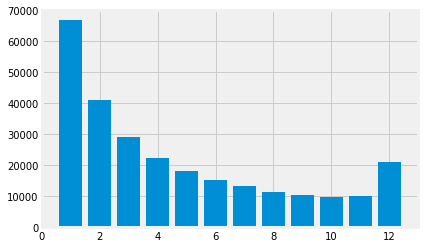

In [28]:
months, books = zip(*trailing_months)
plt.bar(months, books);

## Feature Engineering

### A. Number of Checkouts in the previous 30 days

In [113]:
months = [201712]
thirty_day_checkout_df = month_checkout_df[month_checkout_df["YearMonth"].isin(months)]
thirty_day_checkout_df = thirty_day_checkout_df[["BibNumber","Checkouts"]]
thirty_day_checkout_df = thirty_day_checkout_df.rename({"Checkouts":"30 Days","BibNumber":"BibNum"},axis=1)
thirty_day_checkout_df.head(10)

,BibNum,30 Days
41,475,1
43,491,1
58,576,1
63,662,1
85,759,8
99,762,9
108,979,1
111,1020,1
130,1337,1
133,1424,1


In [115]:
len(thirty_day_checkout_df)   #95,148 unique titles checked out in the previous 30 days

95148

### B. Number of Checkouts in the previous 90 days

In [111]:
months = [201712,201711,201710]
ninety_day_checkout_df = month_checkout_df[month_checkout_df["YearMonth"].isin(months)]
ninety_day_checkout_df = ninety_day_checkout_df.groupby(["BibNumber"]).sum()
ninety_day_checkout_df = ninety_day_checkout_df.reset_index()
ninety_day_checkout_df = ninety_day_checkout_df[["BibNumber","Checkouts"]]
ninety_day_checkout_df = ninety_day_checkout_df.rename({"Checkouts":"90 Days","BibNumber":"BibNum"},axis=1)
ninety_day_checkout_df.head(10)

,BibNum,90 Days
0,33,1
1,91,4
2,141,1
3,172,1
4,185,1
5,446,1
6,475,1
7,491,1
8,551,1
9,576,1


In [116]:
len(ninety_day_checkout_df)   #164,720 unique titles checked out in the previous 90 days

164720

### C. Number of Checkouts in the previous 180 days

In [107]:
months = [201712,201711,201710,201709,201708,201707]
half_year_checkout_df = month_checkout_df[month_checkout_df["YearMonth"].isin(months)]
half_year_checkout_df = half_year_checkout_df.groupby(["BibNumber"]).sum()
half_year_checkout_df = half_year_checkout_df.reset_index()
half_year_checkout_df = half_year_checkout_df[["BibNumber","Checkouts"]]
half_year_checkout_df = half_year_checkout_df.rename({"Checkouts":"180 Days","BibNumber":"BibNum"},axis=1)
half_year_checkout_df.head(10)

,BibNum,180 Days
0,32,1
1,33,2
2,52,1
3,91,8
4,141,1
5,172,2
6,185,1
7,205,1
8,363,1
9,421,1


In [118]:
len(half_year_checkout_df)   #215,982 unique titles checked out in the previous 180 days

215982

### D. Number of Checkouts in 365 Days

In [109]:
full_year_checkout_df = month_checkout_df.groupby(["BibNumber"]).sum()
full_year_checkout_df = full_year_checkout_df.reset_index()
full_year_checkout_df = full_year_checkout_df[["BibNumber","Checkouts"]]
full_year_checkout_df = full_year_checkout_df.rename({"Checkouts":"365 Days","BibNumber":"BibNum"},axis=1)
full_year_checkout_df.head(10)

,BibNum,365 Days
0,32,1
1,33,3
2,52,1
3,91,16
4,141,1
5,167,1
6,172,2
7,181,1
8,185,1
9,196,1


In [119]:
len(full_year_checkout_df)    #269,048 unique titles checked out in the previous 365 days

269048

## Assemble Features

Load in all the books in the inventory

In [92]:
inventory_df = pd.read_csv('../01_Data/03_Cleaned/Library_Collection_Inventory_jan_2018_clean.csv',index_col=0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [105]:
books_df = inventory_df["BibNum"]                    #take only the BibNumber
books_df = books_df.drop_duplicates().to_frame()     #drop duplicate records (in mulitple locations)
books_df.head()

,BibNum
0,3177276
1,395432
2,123754
3,193328
4,1764894


### Merge with individual checkout features

In [130]:
checkout_features_df = books_df.merge(thirty_day_checkout_df,on="BibNum",how="left")
checkout_features_df = checkout_features_df.merge(ninety_day_checkout_df,on="BibNum",how="left")
checkout_features_df = checkout_features_df.merge(half_year_checkout_df,on="BibNum",how="left")
checkout_features_df = checkout_features_df.merge(full_year_checkout_df,on="BibNum",how="left")
checkout_features_df = checkout_features_df.fillna(0)
checkout_features_df.head()

,BibNum,30 Days,90 Days,180 Days,365 Days
0,3177276,14.0,45.0,78.0,94.0
1,395432,0.0,0.0,0.0,1.0
2,123754,1.0,1.0,1.0,1.0
3,193328,0.0,0.0,0.0,0.0
4,1764894,0.0,0.0,0.0,0.0


In [131]:
len(checkout_features_df)   #Still 397,147 unique books in the collection

397147

In [132]:
checkout_features_df.to_csv("../01_Data/06_Features/Checkout_Features.csv")